# Корреляция

In [17]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
bikes = pd.read_pickle('BikesDataImputed(1).pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [3]:
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

In [4]:
bikes_week = pd.concat([temp_mean, bikes_sum], axis=1)

In [5]:
first_five = bikes_week.iloc[:5]

In [6]:
first_five['X - Mx'] = first_five['Temperature'] - first_five['Temperature'].mean()
first_five['Y - My'] = first_five['Rental Count'] - first_five['Rental Count'].mean()

In [7]:
first_five

,Temperature,Rental Count,X - Mx,Y - My
week,,,,
1,-2.694940,39441,1.465357,6641.2
2,-5.079762,30871,-0.919464,-1928.8
3,2.662500,42193,6.822798,9393.2
4,-10.038690,23079,-5.878393,-9720.8
5,-5.650595,28415,-1.490298,-4384.8


In [8]:
SSx = (first_five['X - Mx']**2).sum()
SSy = (first_five['Y - My']**2).sum()
SP = (first_five['X - Mx']*first_five['Y - My']).sum()
print(SSx, SSy, SP)

86.31974305555556 249778436.8 139270.43345238097


In [9]:
r = SP / np.sqrt(SSx*SSy)
print(r)

0.9484760874616524


In [10]:
first_five['Temperature'].corr(first_five['Rental Count'])

0.9484760874616526

In [11]:
bikes_week['Temperature'].corr(bikes_week['Rental Count'])

0.8458075200534891

<Axes: xlabel='Temperature', ylabel='Rental Count'>

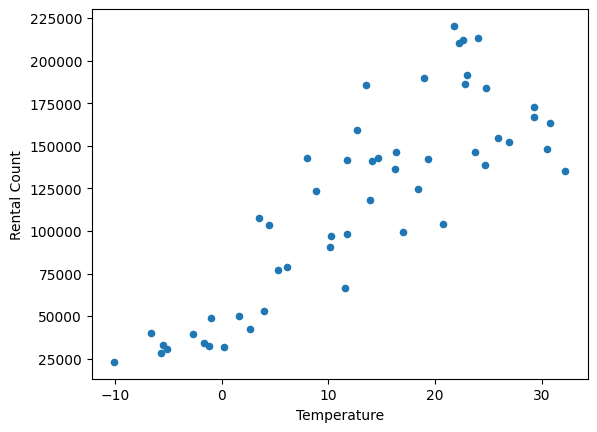

In [12]:
bikes_week.plot('Temperature','Rental Count', kind='scatter')

In [15]:
bikes_week['Temperature'].corr(bikes_week['Rental Count'])

0.8458075200534891

In [19]:
bikes.select_dtypes(include=[float, int]).corr()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Rental Count,Normal Humidity,Good Weather
Hour,1.000000e+00,0.123610,-0.241644,0.285197,0.008715,-0.021516,-1.391486e-16,0.345622,0.107503,0.073698
Temperature,1.236105e-01,1.000000,0.159793,-0.036418,0.050758,-0.217846,-5.570102e-02,0.454749,0.025467,0.206979
Humidity,-2.416438e-01,0.159793,1.000000,-0.336683,0.236397,0.108183,-5.027765e-02,-0.169085,-0.285947,-0.115874
Wind speed,2.851967e-01,-0.036418,-0.336683,1.000000,-0.019674,-0.003554,2.301677e-02,0.097583,0.074964,0.032127
Rainfall,8.714642e-03,0.050758,0.236397,-0.019674,1.000000,0.008500,-1.426911e-02,-0.103519,-0.095339,-0.042127
Snowfall,-2.151645e-02,-0.217846,0.108183,-0.003554,0.008500,1.000000,-1.259072e-02,-0.120869,-0.067939,-0.054942
Holiday,-1.391486e-16,-0.055701,-0.050278,0.023017,-0.014269,-0.012591,1.000000e+00,-0.068822,-0.020156,0.029008
Rental Count,3.456218e-01,0.454749,-0.169085,0.097583,-0.103519,-0.120869,-6.882160e-02,1.000000,0.128521,0.194224
Normal Humidity,1.075026e-01,0.025467,-0.285947,0.074964,-0.095339,-0.067939,-2.015629e-02,0.128521,1.000000,0.440102
Good Weather,7.369784e-02,0.206979,-0.115874,0.032127,-0.042127,-0.054942,2.900771e-02,0.194224,0.440102,1.000000


In [20]:
humidity_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()

In [21]:
bikes_week = pd.concat([bikes_week, humidity_mean, wind_mean], axis=1)

In [22]:
bikes_week.corr()

,Temperature,Rental Count,Humidity,Wind speed
Temperature,1.000000,0.845808,0.584642,-0.420474
Rental Count,0.845808,1.000000,0.389963,-0.434142
Humidity,0.584642,0.389963,1.000000,-0.456225
Wind speed,-0.420474,-0.434142,-0.456225,1.000000


In [23]:
bikes_week.corr()['Rental Count']

,Rental Count
Temperature,0.845808
Rental Count,1.000000
Humidity,0.389963
Wind speed,-0.434142


In [24]:
bikes_week.corr()['Rental Count'].sort_values()

,Rental Count
Wind speed,-0.434142
Humidity,0.389963
Temperature,0.845808
Rental Count,1.000000


In [25]:
bikes_week.corr()['Rental Count'].apply(np.abs).sort_values()

,Rental Count
Humidity,0.389963
Wind speed,0.434142
Temperature,0.845808
Rental Count,1.000000


In [26]:
corr = bikes_week.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

Temperature   Temperature     1.000000
Rental Count  Rental Count    1.000000
Humidity      Humidity        1.000000
Wind speed    Wind speed      1.000000
Temperature   Rental Count    0.845808
Rental Count  Temperature     0.845808
Temperature   Humidity        0.584642
Humidity      Temperature     0.584642
              Wind speed      0.456225
Wind speed    Humidity        0.456225
Rental Count  Wind speed      0.434142
Wind speed    Rental Count    0.434142
Temperature   Wind speed      0.420474
Wind speed    Temperature     0.420474
Rental Count  Humidity        0.389963
Humidity      Rental Count    0.389963
dtype: float64

In [29]:
df = pd.DataFrame(
    {
        'x': [13, 21, 30, 65, 50],
        'y': [200, 90, 10, 83, 12]
    }
)
df.corr()

,x,y
x,1.000000,-0.506545
y,-0.506545,1.000000
